In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv(r'C:\Users\marku\Desktop\ML\MLGit\datasets\titanic.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here you can see that the max fare price is over 15x the price of the 75%. This means that this a major outlier. For some algorithms this may cause problems

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Cleaning the dataset

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Feature selection

- Removing PassengerId due to it holding no meaningful data for visualizing or ML
- Removing name for the same reason
- Ticket consists of the ticket number which probably have no correlation with survival
- Cabin has way to many null-values to give us any meaningful info and therefor I removed it

In [10]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

## Null-values

In [11]:
# To find which place most people embarked from to set this as the embarked for Null values
max = df.groupby('Embarked').count()
# print(max)

# Sets null values equal to the median of that column
def handle_null_median(df):
    # Need to set inplace=True, so it doesn't create a copy of the dataframe. Tried without and this led to null-values not being removed
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Age'].fillna(df['Age'].median(), inplace=True)

    df['Embarked'].fillna('S', inplace=True)

    return  df

# Sets null values equal to the mean of that column
def handle_null_mean(df):
    df['Fare'].fillna(df['Fare'].mean(), inplace=True)
    df['Age'].fillna(df['Age'].mean(), inplace=True)

    df['Embarked'].fillna('S', inplace=True)

    return  df

# Function to drop all rows with at least 1 null value. (Removes way to many rows, so isn't a good option)
def null_values_drop(df):
    df_copy = df.copy()
    df_drop = df_copy.dropna(axis=0, how='any')

    return df_drop

df = handle_null_median(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
# Check the new sum of nulls
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
# Encoding Sex to be represented by either ones or zeroes
df['Sex'] = df['Sex'].replace(['female', 'male'], [0,1])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


## Normalizing

In [14]:
def min_max_normalizing(df):
    df['Fare'] = (df['Fare'] - df['Fare'].min()) / \
                      (df['Fare'].max() - df['Fare'].min())

    return df

# Z-score Normalizing
def z_score_normalizing(df):
    df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
    df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

    return df

# df = min_max_normalizing(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


## Feature Engineering

In [15]:
pd.cut(df['Age'], 5)

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Age, Length: 891, dtype: category
Categories (5, interval[float64, right]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [16]:
# Got the idea of splitting age into bins from: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier, but seems like a common practice called Binning, where you put a range of values into a bin
def bins(df): # This is kind of feature engineering as well
    df['AgeGroup'] = 0
    df.loc[df['Age'] < 16.336, 'AgeGroup' ] = 0
    df.loc[(df['Age'] >= 16.336) & (df['Age'] < 32.252), 'AgeGroup'] = 1
    df.loc[(df['Age'] >= 32.252) & (df['Age'] < 48.168), 'AgeGroup'] = 2
    df.loc[(df['Age'] >= 48.168) & (df['Age'] < 64.084), 'AgeGroup'] = 3
    df.loc[df['Age'] >= 64.084, 'AgeGroup'] = 4

    # Could also make a FareGroup column, but don't think I'll gain any useful information I don't already have in Pclass

    return df

df = bins(df)

In [17]:
# Got this idea from a Titanic notebook: https://www.kaggle.com/code/sinakhorami/titanic-best-working-classifier
df['FamilyMembersCount'] = df['Parch'] + df['SibSp'] + 1
df[['Parch', 'SibSp', 'FamilyMembersCount']].head()

,Parch,SibSp,FamilyMembersCount
0,0,1,2
1,0,1,2
2,0,0,1
3,0,1,2
4,0,0,1


In [18]:
# Drop columns no longer used after feature engineering
df = df.drop(['Parch', 'SibSp'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,AgeGroup,FamilyMembersCount
0,0,3,1,22.0,7.2500,S,1,2
1,1,1,0,38.0,71.2833,C,2,2
2,1,3,0,26.0,7.9250,S,1,1
3,1,1,0,35.0,53.1000,S,2,2
4,0,3,1,35.0,8.0500,S,2,1


# EDA

## Feature Correlation Investigation

In [19]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


The biggest indicator if you were going to survive the Titanic was your gender. From this statistic we can conclude:
- Men were less prioritized and only 19% of all men onboard survived, while 74% of all females survived

In [20]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Here we can see a clear correlation between survival and Ticket class. The higher your class the more likely you were of surviving. This correlation can come from a wide range of different reasons. The two reasons I find the most likely is:
- Higher classes were situated closer to the main deck and therefore had easier access to the few lifeboats. On the contrary, the lower class(Pclass 3) was most often situated at the lower decks and therefore had a greater chance of dying from the initial floding of the boat
- Higher classes were also most likely prioritized when it came to which was getting a lifeboat

In [21]:
df[['FamilyMembersCount', 'Survived']].groupby(['FamilyMembersCount'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilyMembersCount,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Here we can see that people traveling with a FamilySize of 4 had the greatest chance of survival:
- This could be a result of higher classes normally having smaller FamilySizes.

We can also see that with a FamilySize over 7, your chance of survival was 0%. This could be because of a handful of reasons, but most likely:
- A low number of families were larger than 7 and by random they all died. Let's say it was only two families bigger than 7 and just by chance they all died
- Bigger FamilySize = Lower class = Lower chance of survival from earlier analysis
- Could also be due to collective suicide. Their mentality could've been since all of us most likely won't survive, let's end it together.

With a FamilySize of 1, the person was traveling alone. When traveling alone your chances of surviving was amongst the smallest. I accredit this to one main reason:
- People traveling alone was most likely males and therefor from previous analysis had the lowest chance of survival.

In [22]:
df[['FamilyMembersCount', 'Sex']].groupby(['FamilyMembersCount'], as_index=False).mean().sort_values(by='FamilyMembersCount', ascending=True)

,FamilyMembersCount,Sex
0,1,0.765363
1,2,0.459627
2,3,0.519608
3,4,0.344828
4,5,0.200000
5,6,0.636364
6,7,0.333333
7,8,0.666667
8,11,0.571429


This statistic is to back up my last claim of people traveling alone was most likely males, and therefor more likely to die. Here we can see that:
- 76% of all traveling alone, were male

In [23]:
df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


With a quick google search we know that C = Cherbourg, Q = Queenstown and S = Southampton. Q and S have basically the same survival rate, but C outperforms these with 20% percent. I think the main reason for this is:
- Cherbourg being a richer city than Queenstown and Southampton and therefor more people traveling in first class. I'll look more into this

In [24]:
df[['Embarked', 'Fare']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Fare
0,C,59.954144
1,Q,13.276030
2,S,27.243651


Here we can se that people traveling from C, paid on average over twice as much for their ticket as someone from S, and over 3 times a much as those traveling from Q. We know that higher fare prices indicates higher classes. Therefor, I was right in saying that people traveling from C were richer, and having a higher chance of survival.

In [25]:
df[['AgeGroup', 'Survived']].groupby(['AgeGroup'], as_index=False).mean()

,AgeGroup,Survived
0,0,0.550000
1,1,0.344168
2,2,0.404255
3,3,0.434783
4,4,0.090909


Here we can see that if you belonged to AgeGroup 0 (16 or younger) you had the greatest chance of survival.

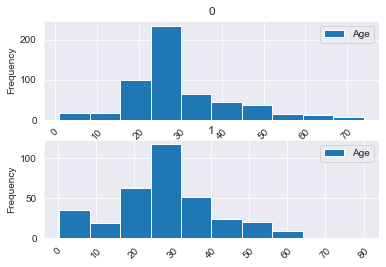

In [26]:
survived_by_age = df.plot(column='Age',
        by='Survived',
        kind='hist',
        alpha=1,
        rot=45,
        grid=True,
        )

This visual representation gives us an idea of how many people died and survived for each age group. From this representation we can conclude:
- Most kids under the age of 10 survived. (Women and children first mentality)
- Most death amongst people in the age of 20-35. (Most people on the boat was in this age group)
- No-one over the age of late 70's survived. (Probably de-prioritized)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

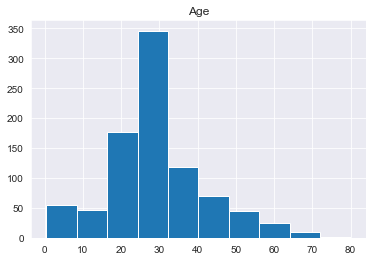

In [27]:
df.hist(column='Age')

Most people are between mid 20's and early 30's. With some outliers closing in on 80. If you take a look at the next plot; most pople dying is in this exact Age range.

In [28]:
df['Pclass'] =  df['Pclass'].astype('category')
df['Embarked'] =  df['Embarked'].astype('category')
df['AgeGroup'] =  df['AgeGroup'].astype('category')
df['Sex'] =  df['Sex'].astype('category')

df_copy = df.copy()
df_copy = df_copy.drop(columns=['AgeGroup'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Survived            891 non-null    int64   
 1   Pclass              891 non-null    category
 2   Sex                 891 non-null    category
 3   Age                 891 non-null    float64 
 4   Fare                891 non-null    float64 
 5   Embarked            891 non-null    category
 6   AgeGroup            891 non-null    category
 7   FamilyMembersCount  891 non-null    int64   
dtypes: category(4), float64(2), int64(2)
memory usage: 32.0 KB


In [29]:
df_copy = pd.get_dummies(df_copy)

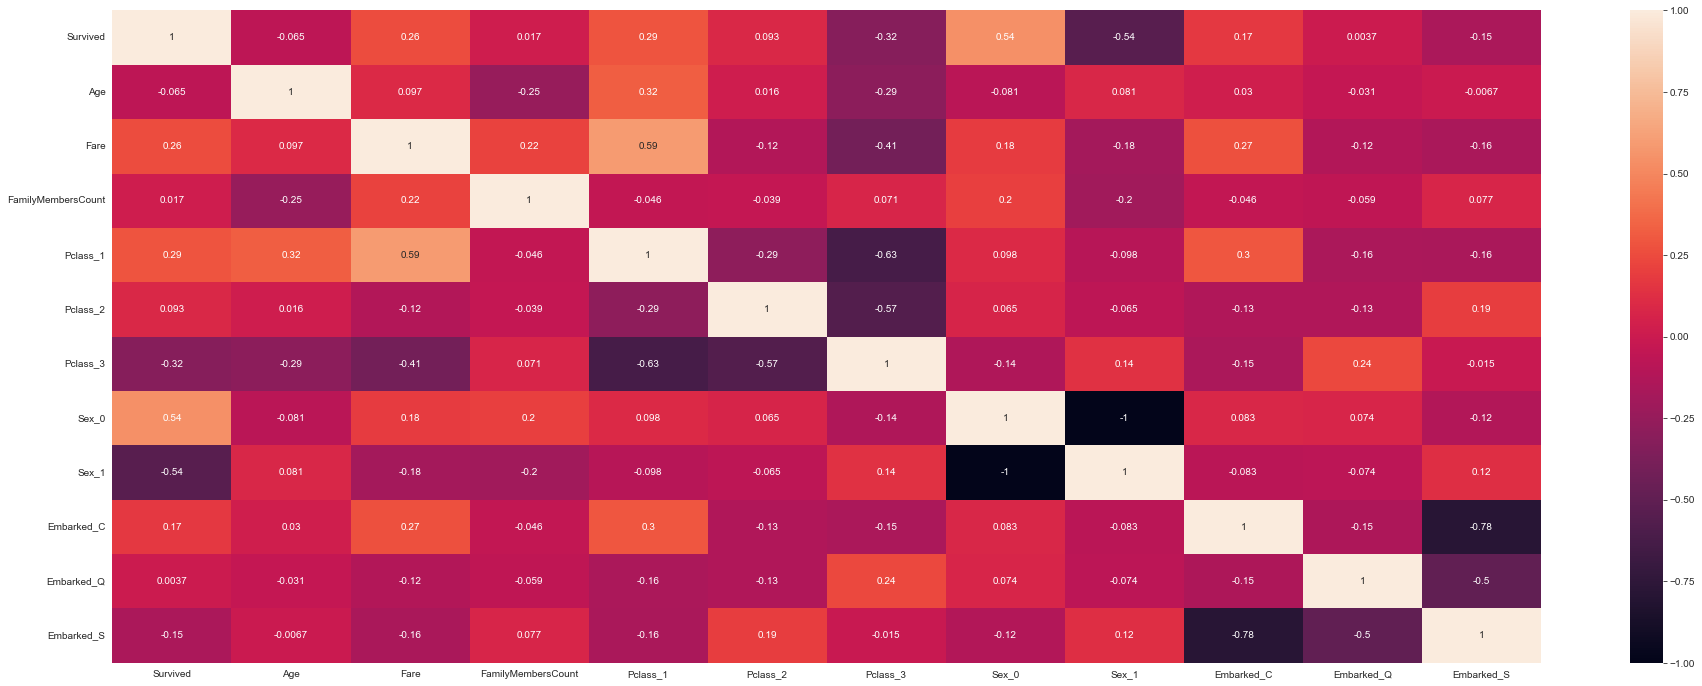

In [30]:
corr = df_copy.corr()
plt.figure(figsize=(32, 12))
heatmap = sns.heatmap(corr, annot=True)

Heatmaps are a great way of visualizing the correlation between two features
This heatmap showed a strong correlation between survival and: sex, age and ticket class, with a lesser correlation with fare and close to zero correlation with family size.

# The Final Dataset

I'm dropping Age due to the AgeGroup column.

In [31]:
df = pd.get_dummies(df)
df = df.drop(columns=['Age'])
df

,Survived,Fare,FamilyMembersCount,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,AgeGroup_4
0,0,7.2500,2,0,0,1,0,1,0,0,1,0,1,0,0,0
1,1,71.2833,2,1,0,0,1,0,1,0,0,0,0,1,0,0
2,1,7.9250,1,0,0,1,1,0,0,0,1,0,1,0,0,0
3,1,53.1000,2,1,0,0,1,0,0,0,1,0,0,1,0,0
4,0,8.0500,1,0,0,1,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,13.0000,1,0,1,0,0,1,0,0,1,0,1,0,0,0
887,1,30.0000,1,1,0,0,1,0,0,0,1,0,1,0,0,0
888,0,23.4500,4,0,0,1,1,0,0,0,1,0,1,0,0,0
889,1,30.0000,1,1,0,0,0,1,1,0,0,0,1,0,0,0
